In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

RANDOM_SEED = 42

In [3]:
df = pd.read_csv("./../data/Ana_Health-Tabela_Modelo_Previsao_Churn.csv",skiprows=1)
df

,id_person,birthdate,id_gender,id_marrital_status,state,city,postal_code,id_health_plan,id_person_recommendation,contract_start_date,...,Ligações Outbound,Data Última Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Método de Pagamento,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência,Qde Perfis de Pagamento Inativos
0,250,1971-04-01,64.0,82.0,São Paulo,São Paulo,04534-020,417.0,NaN,2021-01-28,...,2.0,2022-04-25 19:18:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1,254,NaN,NaN,NaN,North Carolina,Mecklenburg County,28203,NaN,NaN,2020-12-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
2,314,1985-08-01,NaN,NaN,São Paulo,São Paulo,05337-030,NaN,NaN,2021-01-21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
3,315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
4,317,1986-10-14,NaN,NaN,São Paulo,São Paulo,05421-050,NaN,NaN,2021-01-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,5948,1990-08-13,64.0,80.0,Bahia,Salvador,41830-120,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,50.0,0.0,0.0,0.0,False
1198,5949,1997-04-17,64.0,80.0,São Paulo,São Paulo,05014-001,NaN,NaN,2023-11-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1199,5951,1973-10-20,111.0,83.0,São Paulo,São Paulo,04883-190,412.0,NaN,2023-10-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1200,5954,1970-08-14,63.0,82.0,São Paulo,São Paulo,04513-100,NaN,NaN,2023-11-07,...,NaN,NaN,1.0,1.0,Cartão de crédito,120.0,0.0,0.0,0.0,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1202 entries, 0 to 1201
Data columns (total 75 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id_person                                   1202 non-null   int64  
 1   birthdate                                   1191 non-null   object 
 2   id_gender                                   1178 non-null   float64
 3   id_marrital_status                          1178 non-null   float64
 4   state                                       1185 non-null   object 
 5   city                                        1183 non-null   object 
 6   postal_code                                 1163 non-null   object 
 7   id_health_plan                              524 non-null    float64
 8   id_person_recommendation                    110 non-null    float64
 9   contract_start_date                         1202 non-null   object 
 10  contract_end

In [5]:
df.describe()

,id_person,id_gender,id_marrital_status,id_health_plan,id_person_recommendation,id_continuity_pf,Canal de Preferência,notes_count,done_activities_count,id_label,...,Mensagens Inbound,Mensagens Outbound,Ligações Inbound,Ligações Outbound,Qde Total de Faturas,Qde Total de Tentativas de Cobrança,Valor Médio da Mensalidade,Qde Total de Faturas Pagas após Vencimento,Qde Total de Faturas Inadimpletes,Valor Total Inadimplência
count,1202.000000,1178.000000,1178.000000,524.000000,110.000000,395.000000,384.000000,1202.000000,1202.000000,103.000000,...,1091.000000,1158.000000,118.000000,579.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,3484.637271,63.729202,80.619694,417.921756,2555.736364,338.878481,244.635417,1.182196,10.122296,317.135922,...,75.735105,83.278066,3.144068,2.861831,6.325397,8.714286,94.484683,0.880952,0.250000,24.182738
std,1468.065478,3.353515,0.977062,129.712462,1213.154949,0.327144,25.618050,1.908197,8.938732,11.220647,...,104.519681,98.981933,8.482537,8.430147,4.803434,7.736556,32.399305,1.536318,0.821159,76.092674
min,250.000000,63.000000,80.000000,78.000000,321.000000,338.000000,238.000000,0.000000,0.000000,284.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,50.000000,0.000000,0.000000,0.000000
25%,2399.250000,63.000000,80.000000,412.000000,1510.000000,339.000000,239.000000,0.000000,5.000000,313.000000,...,13.000000,19.000000,1.000000,1.000000,3.000000,3.000000,78.000000,0.000000,0.000000,0.000000
50%,3281.500000,64.000000,80.000000,412.000000,2379.000000,339.000000,239.000000,1.000000,8.000000,325.000000,...,40.000000,50.000000,1.000000,2.000000,5.000000,7.000000,88.000000,0.000000,0.000000,0.000000
75%,5114.750000,64.000000,82.000000,419.500000,3347.500000,339.000000,239.000000,2.000000,13.000000,325.000000,...,96.500000,110.000000,2.000000,3.000000,9.000000,12.000000,111.100000,1.000000,0.000000,0.000000
max,5956.000000,117.000000,83.000000,1164.000000,5556.000000,339.000000,360.000000,31.000000,137.000000,325.000000,...,1436.000000,1230.000000,80.000000,197.000000,30.000000,41.000000,383.750000,9.000000,7.000000,616.000000


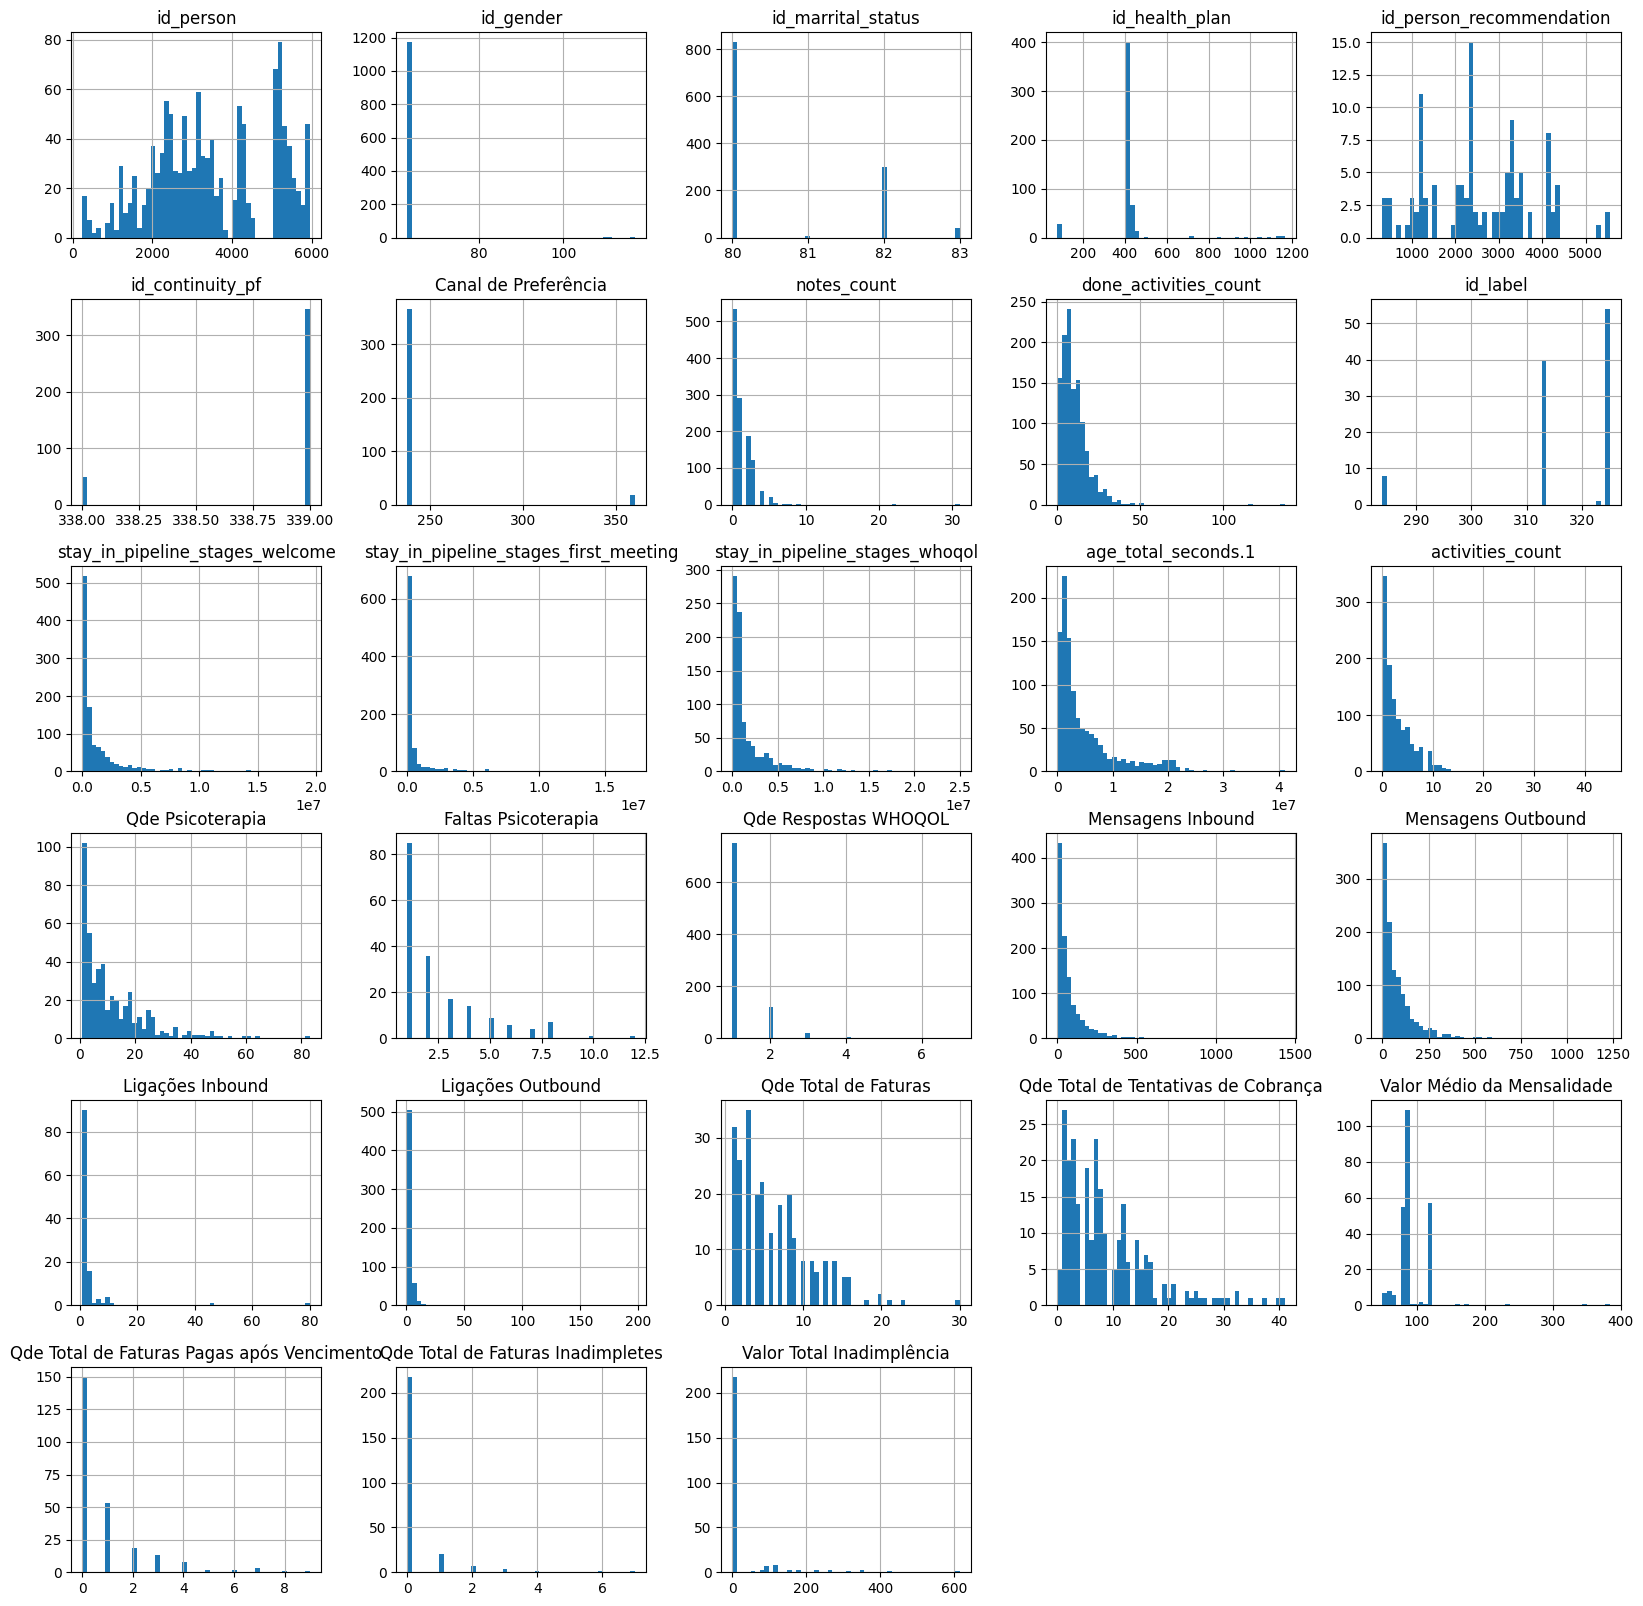

In [6]:
df.hist(bins=50, figsize=(20,20))
plt.show()

Gráfico de dispersão para visualizar a relação entre a coluna de destino e outras colunas do conjunto de dados

# Análise Exploratória

In [7]:
df_erik = df[['Qde Total de Faturas Inadimpletes', 'Cancelamentos Atendimento Médico', 'Problemas Abertos', 'Psicológico', 'Método de Pagamento', 'Mensagens Inbound', 'notes_count', 'Físico', 'Qde Atendimento Médico', 'id_marrital_status', 'id_org', 'start_of_service']]

df_leo = df[['Qde Prescrições', 'Ligações Outbound', 'Datas Acolhimento', 'id_stage', 'Data Última Mensagens Inbound', 'Faltas Atendimento Médico', 'Pontos de Atenção', 'activities_count', 'Recebe Comunicados?', 'Qde Total de Faturas', 'Data Última Ligações Inbound', 'id_gender']]

df_matheus = df[['Faltas Acolhimento', 'Qde Perfis de Pagamento Inativos', 'Datas Prescrição', 'Valor Total Inadimplência', 'id_continuity_pf', 'add_time', 'Qde Respostas WHOQOL', 'Datas Psicoterapia', 'Cancelamentos Acolhimento', 'won_time', 'Canal de Preferência', 'Ambiental']]

df_alfredo = df[['lost_reason.1', 'lost_reason', 'Mensagens Outbound', 'Datas Atendimento Médico', 'stay_in_pipeline_stages_whoqol', 'id_label', 'done_activities_count', 'state', 'Faltas Psicoterapia', 'Data Última Mensagens Outbound', 'Qde Atendimentos Acolhimento', 'status']]

df_gustavo = df[['Qde Total de Faturas Pagas após Vencimento', 'birthdate', 'Qde Psicoterapia', 'stay_in_pipeline_stages_first_meeting', 'status.1', 'Data Última Ligações Outbound', 'lost_time', 'Ligações Inbound', 'Qde Total de Tentativas de Cobrança', 'Cancelamentos Psicoterapia', 'Faltas Todos Atendimento', 'Valor Médio da Mensalidade']]

## Erik

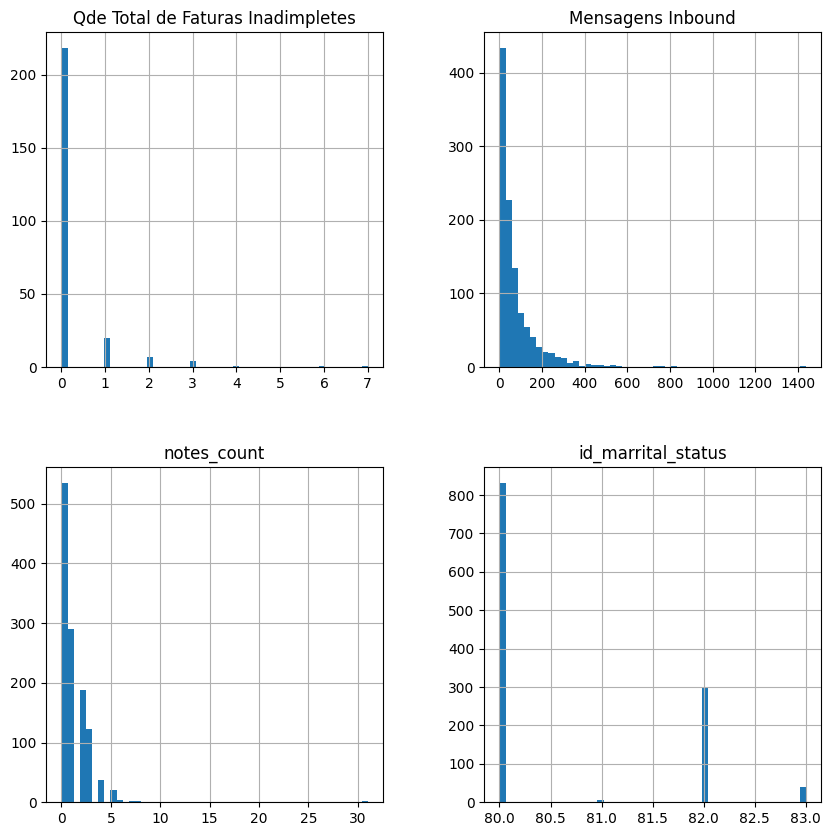

In [8]:
df_erik.hist(bins=50, figsize=(10,10))
plt.show()

In [9]:
df_erik["notes_count"].value_counts()

notes_count
0     534
1     290
2     188
3     122
4      37
5      20
6       3
31      2
8       2
7       2
22      1
9       1
Name: count, dtype: int64

Qtd total de faturas inadimplentes: Mudar para bool ou 1 e 0. Considerando apenas dois grupos, já teve inadimplente ou nunca teve inadimplente

In [14]:
df_erik["Qde Total de Faturas Inadimpletes"].value_counts()

Qde Total de Faturas Inadimpletes
0.0    218
1.0     20
2.0      7
3.0      4
4.0      1
6.0      1
7.0      1
Name: count, dtype: int64

Cancelamentos Atendimento Médico: Excluir colunas "Cancelamento Atendimento Médico" e coluna "Qde Atendimento Médico". Pois estão sem dados coletados.

In [17]:
colunas_bool = df_erik.select_dtypes(include='bool').columns
df_erik[colunas_bool].describe().transpose()

,count,unique,top,freq
Cancelamentos Atendimento Médico,1202,1,False,1202
Qde Atendimento Médico,1202,1,False,1202


In [19]:
colunas_object = df_erik.select_dtypes(include='object').columns
df_erik[colunas_object].describe().transpose()

,count,unique,top,freq
Problemas Abertos,610,548,ansiedade P01 (CIAP-2),11
Psicológico,898,130,4,275
Método de Pagamento,252,4,Cartão de crédito,227
Físico,898,139,"3,90",64
id_org,886,63,2457,123
start_of_service,1065,420,2023-06-12,43


Problemas Abertos: MUITO diverso, agrupar de alguma forma? 

In [20]:
df_erik["Problemas Abertos"].describe()

count                        610
unique                       548
top       ansiedade P01 (CIAP-2)
freq                          11
Name: Problemas Abertos, dtype: object

Também apresenta uma grande diversidade de dados, agrupar por categorias?

In [21]:
df_erik["Psicológico"].value_counts()

Psicológico
4                275
3                247
2                 58
5                 43
3,3               16
                ... 
3,7; 4,0; 3,3      1
3,2; 3,3; 3,3      1
3,7; 3,2           1
4,2; 4,7           1
3,2; 3,2           1
Name: count, Length: 130, dtype: int64

In [22]:
df_erik["Método de Pagamento"].value_counts()

Método de Pagamento
Cartão de crédito    227
Dinheiro              15
Boleto YaPay           9
Pix                    1
Name: count, dtype: int64

In [23]:
df_erik["Físico"].value_counts()

Físico
3,90        64
3,70        63
4,10        63
4,00        59
3,60        58
            ..
4,4; 4,1     1
3,6; 4,9     1
4,0; 4,9     1
4,3; 4,7     1
3,4; 3,4     1
Name: count, Length: 139, dtype: int64

In [24]:
df_erik["id_marrital_status"].value_counts()

id_marrital_status
80.0    830
82.0    300
83.0     41
81.0      7
Name: count, dtype: int64

Id Org talvez não seja necessário, pois não é necessário o identificador da empresa para prever os cancelamentos.

In [25]:
df_erik["id_org"].value_counts()

id_org
2457         123
1436         103
448           98
2458          48
1251          46
            ... 
619            1
1605           1
448; 1436      1
929; 929       1
2909           1
Name: count, Length: 63, dtype: int64

Talvez seja interessante agrupar os dados por mês, para ver se existe alguma sazonalidade.

In [27]:
df_erik["start_of_service"].value_counts()

start_of_service
2023-06-12                43
2022-03-04                38
2023-06-14                25
2022-08-01                22
2023-06-13                19
                          ..
2022-07-28                 1
2022-07-27; 2022-07-27     1
2022-07-21                 1
2022-07-13                 1
2023-11-08                 1
Name: count, Length: 420, dtype: int64

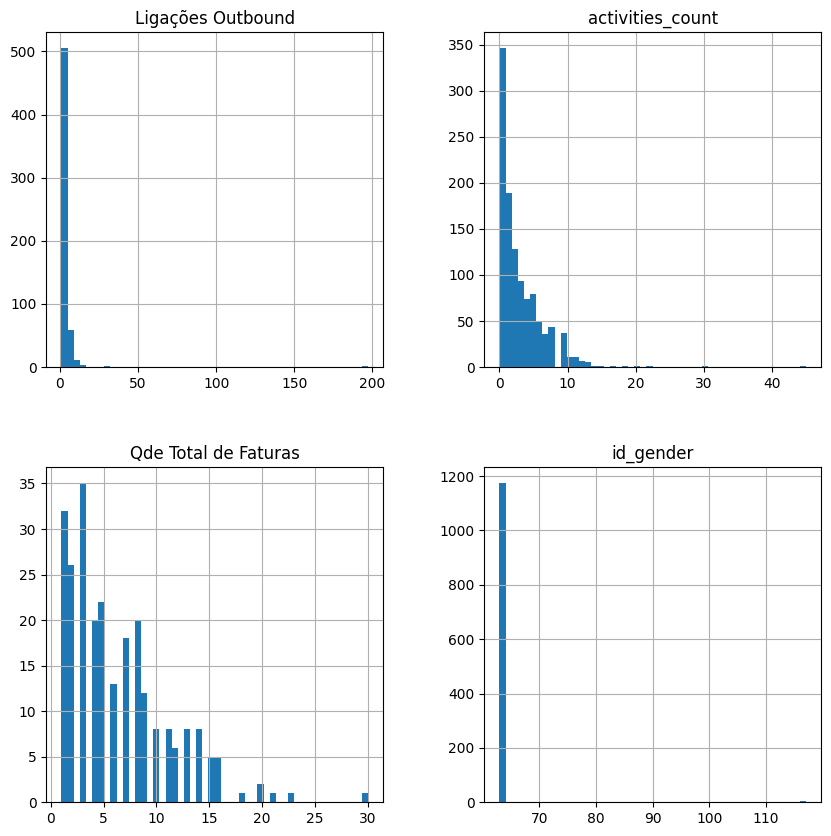

In [10]:
df_leo.hist(bins=50, figsize=(10,10))
plt.show()

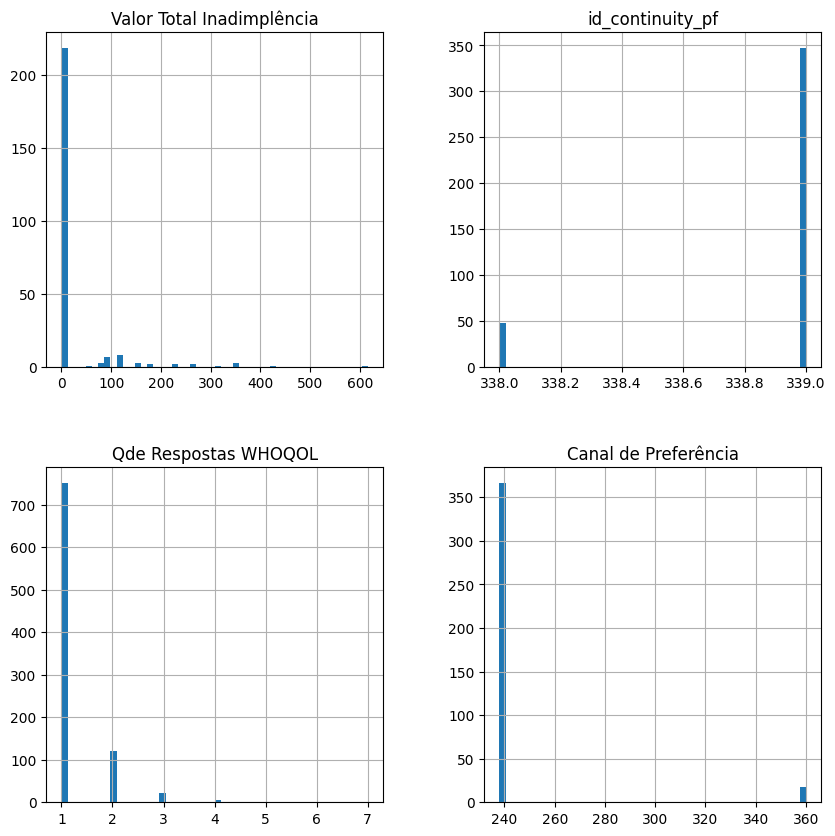

In [11]:
df_matheus.hist(bins=50, figsize=(10,10))
plt.show()

array([[<Axes: title={'center': 'Mensagens Outbound'}>,
        <Axes: title={'center': 'stay_in_pipeline_stages_whoqol'}>],
       [<Axes: title={'center': 'id_label'}>,
        <Axes: title={'center': 'done_activities_count'}>],
       [<Axes: title={'center': 'Faltas Psicoterapia'}>, <Axes: >]],
      dtype=object)

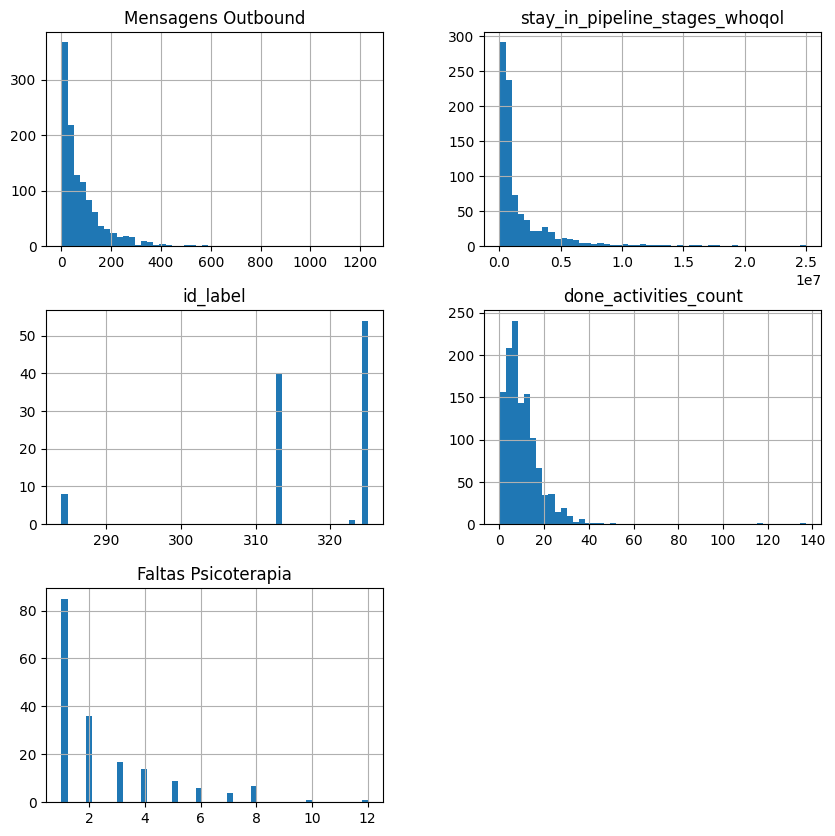

In [12]:
df_alfredo.hist(bins=50, figsize=(10,10))

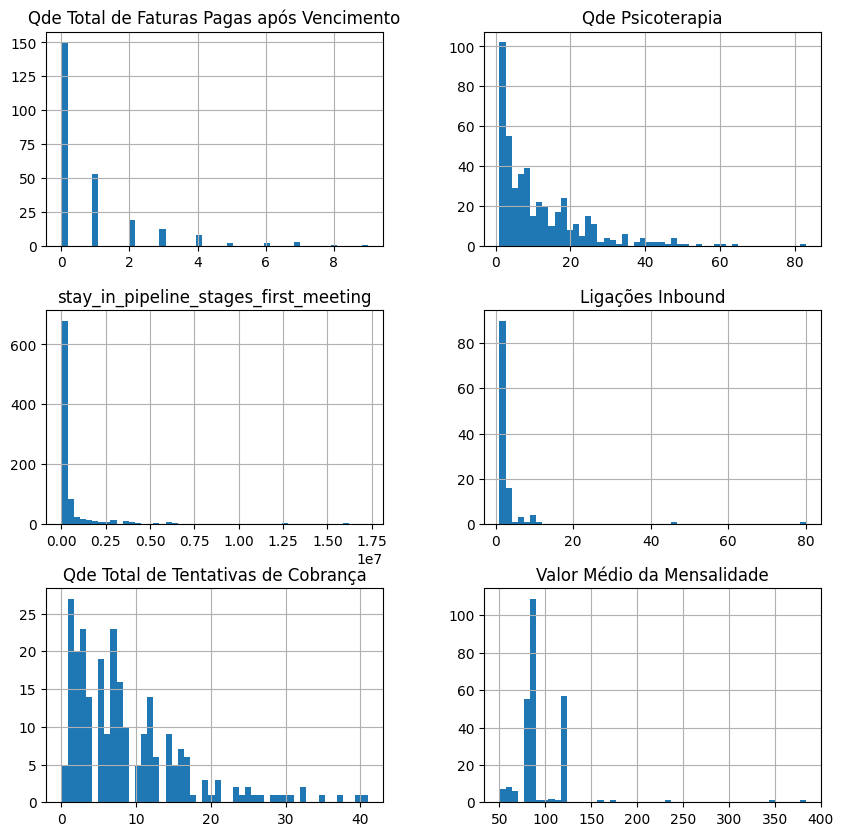

In [13]:
df_gustavo.hist(bins=50, figsize=(10,10))
plt.show()